In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
tweets_df = pd.read_csv("Tweets.csv", encoding = "utf-8")
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
100*tweets_df.isna().sum()/len(tweets_df)
tweets_df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1, inplace =True)

In [4]:
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes = Lst

    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

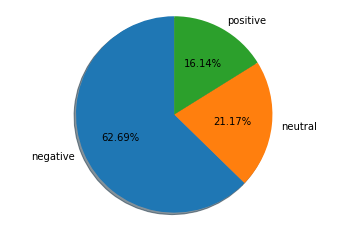

In [5]:
createPieChartFor(tweets_df.airline_sentiment)

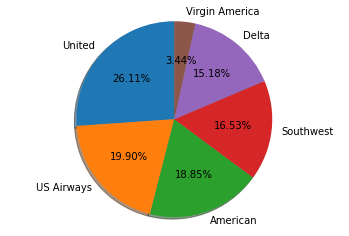

In [6]:
createPieChartFor(tweets_df.airline)

In [7]:
from wordcloud import WordCloud,STOPWORDS
def createWrdCloudForSentiment(sentiment):
    temp_df = tweets_df[tweets_df.airline_sentiment==sentiment]
    words = " ".join(temp_df.text)
    cleaned_words = " ".join([w for w in words.split()
                             if 'http' not in w 
                             and not w.startswith('@')
                             and w!='RT'])

    wrdcld = WordCloud(stopwords=STOPWORDS,
background_color='black',
width=1500,
height=1000).generate(cleaned_words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show


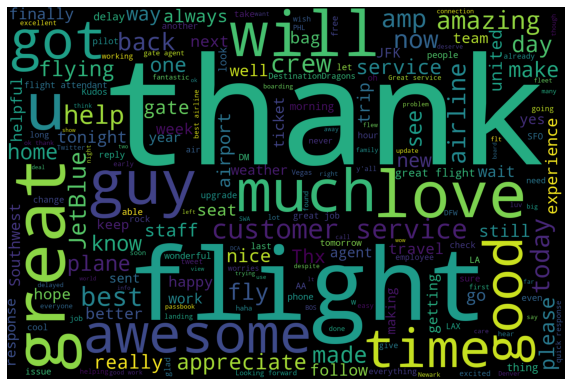

In [8]:
createWrdCloudForSentiment('positive')

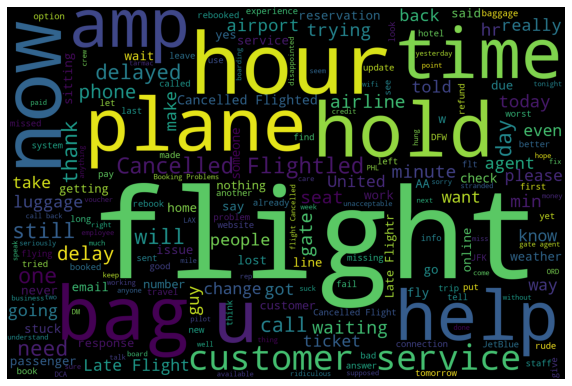

In [9]:
createWrdCloudForSentiment('negative')

In [10]:
.0.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
eng_stops = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


In [11]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
def process_message(tweet):
    # remove all the special characters
    new_tweet = re.sub("[^a-zA-Z]", " ",tweet)
    # convert all letters to lower case
    words = new_tweet.lower().split()
    # remove stop words
    words = [w for w in words if not w in eng_stops]
    # stemming
    words = [stemmer.stem(word) for word in words]
    # lemmatizer
    words = [lemmatizer.lemmatize(word) for word in words]
    # join all words back to text
    return (" ".join(words))

In [13]:
tweets_df['clean_tweet']=tweets_df['text'].apply(lambda x: process_message(x))

In [14]:
train_df, test_df = train_test_split(tweets_df, test_size=0.3, random_state=42)

In [15]:
train_tweets =[]
for tweet in train_df.clean_tweet:
    train_tweets.append(tweet)
test_tweets =[]
for tweet in test_df.clean_tweet:
    test_tweets.append(tweet)

In [16]:
vectorizer = TfidfVectorizer()
train_tfidf_model = vectorizer.fit_transform(train_tweets)
test_tfidf_model = vectorizer.transform(test_tweets)

In [17]:
train_tfidf = pd.DataFrame(train_tfidf_model.toarray(), columns=vectorizer.get_feature_names())
train_tfidf

,aa,aaaand,aaadvantag,aaalwaysl,aadavantag,aadelay,aadv,aadvantag,aafail,aakjumxa,...,zv,zvfmxnuelj,zvhco,zwmuoon,zwzc,zxzn,zy,zz,zza,zzkqwwbjz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
lbl_actual = test_df.airline_sentiment
i = 0

model = KNeighborsClassifier(n_neighbors = 5).fit(train_tfidf_model,train_df.airline_sentiment)
lbl_pred = model.predict(test_tfidf_model)
a = (100*accuracy_score(lbl_pred, lbl_actual))
a = round(a,2)
#accuracy.append(a)
#cls_name.append(cl.__class__.__name__)
print ("{} Accuracy Score : {}%".format('KNN',a))
print ( classification_report(lbl_pred, lbl_actual))

KNN Accuracy Score : 70.95%
              precision    recall  f1-score   support

    negative       0.83      0.80      0.81      2925
     neutral       0.47      0.45      0.46       919
    positive       0.52      0.66      0.58       548

    accuracy                           0.71      4392
   macro avg       0.61      0.64      0.62      4392
weighted avg       0.72      0.71      0.71      4392



In [19]:
lg_lbl_pred_df = pd.DataFrame({'tweet_id': test_df.tweet_id,
                             'text' : test_df.text,
                             'lg_reg' : lbl_pred})
lg_lbl_pred_df.head()

,tweet_id,text,lg_reg
4794,569731104070115329,@SouthwestAir you're my early frontrunner for ...,positive
10480,569263373092823040,@USAirways how is it that my flt to EWR was Ca...,negative
8067,568818669024907264,@JetBlue what is going on with your BDL to DCA...,negative
8880,567775864679456768,@JetBlue do they have to depart from Washingto...,neutral
8292,568526521910079488,@JetBlue I can probably find some of them. Are...,neutral
